<center><img src="redpopcorn.jpg"></center>

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to test my exploratory data analysis skills and dive into the entertainment industry.

This project compares Netflix’s 1990s movie catalog to recent years (2016–2021), to explore how the platform’s content has evolved and what nostalgic trends might be worth revisiting.


## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [6]:
# Uploading the local data file since colab runs on cloud and cannot manually upoad files
from google.colab import files
uploaded = files.upload()

Saving netflix_data.csv to netflix_data.csv


**Importing necessary libraries and the Netflix Dataset**

---



In [10]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read in the Netflix CSV as a DataFrame
netflix_df = pd.read_csv("netflix_data.csv")


**Data Cleaning and Segmentation**

---

Filteration of movies from Netflix and segmentation of both classical/nostalgic and modern movies.

In [13]:
# Filtering netflix movies
netflix_movies = netflix_df[netflix_df['type'] == 'Movie']

# Filtering movies from the 90's which are between 1990 - 2000
classic_movies = netflix_movies[np.logical_and(netflix_movies['release_year'] >= 1990, netflix_movies['release_year'] < 2000)]

# Filtering movies from the modern era which is from 2016-2021
modern_movies = netflix_movies[np.logical_and(netflix_movies['release_year'] >= 2016, netflix_movies['release_year'] < 2022)]


**Exploratory Data Analysis (EDA)**

---



Genre Breakdown : Analysis of what genre's were most common in both eras.

Action: 48
Dramas: 44
Comedies: 40



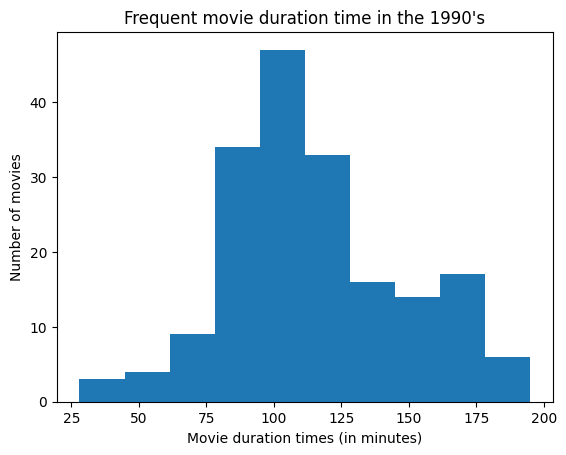

In [79]:
# Filtering the top 3 genres in terms of the 90's era
classic_genres = classic_movies['genre'].value_counts().head(3)
for genre, count in classic_genres.items():
    print(f"{genre}: {count}")

print()

# Adding histogram with labels and a title for more clarity and vizualization
plt.hist(classic_movies['duration'])
plt.title("Frequent movie duration time in the 1990's")
plt.xlabel("Movie duration times (in minutes)")
plt.ylabel("Number of movies")
plt.show()



Dramas: 784
Comedies: 530
Action: 302



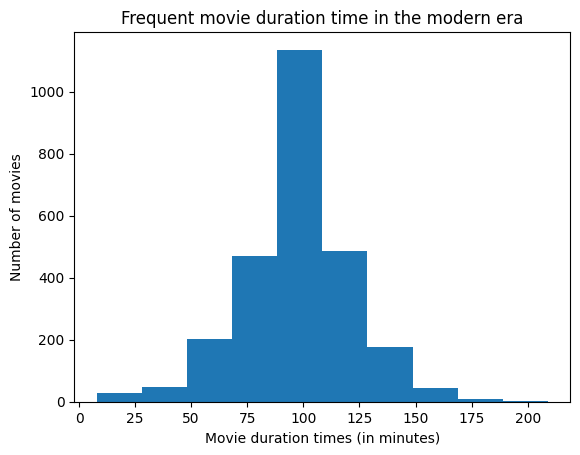

In [80]:
#Filtering the top 3 genre's of the modern era on Netflix
modern_genres = modern_movies['genre'].value_counts().head(3)
for genre, count in modern_genres.items():
    print(f"{genre}: {count}")

print()

# Adding histogram with labels and a title for more clarity
plt.hist(modern_movies['duration'])
plt.title("Frequent movie duration time in the modern era")
plt.xlabel("Movie duration times (in minutes)")
plt.ylabel("Number of movies")
plt.show()

duration = 100

Inclusivity of countries : Analysis of the number of inclusive countries inboth eras.

In [34]:
# Filtering the top 3 countries in the 90's era where movies originated from
classic_countries = classic_movies['country'].value_counts().head(3)
for country, count in classic_countries.items():
  print(f"{country}: {count}")

United States: 99
India: 34
United Kingdom: 17


In [35]:
# Filtering the top 3 countries in the modern era where movies originated from
modern_countries = modern_movies['country'].value_counts().head(3)
for country, count in modern_countries.items():
  print(f"{country}: {count}")

United States: 985
India: 374
United Kingdom: 160


Popularity of Directors/Casts : Popularity of Directors and casts from both eras.

Johnnie To: 4
Rajkumar Santoshi: 3
Mahesh Bhatt: 3

Most popular cast member: Bill Hicks (Starred in 3 movies)



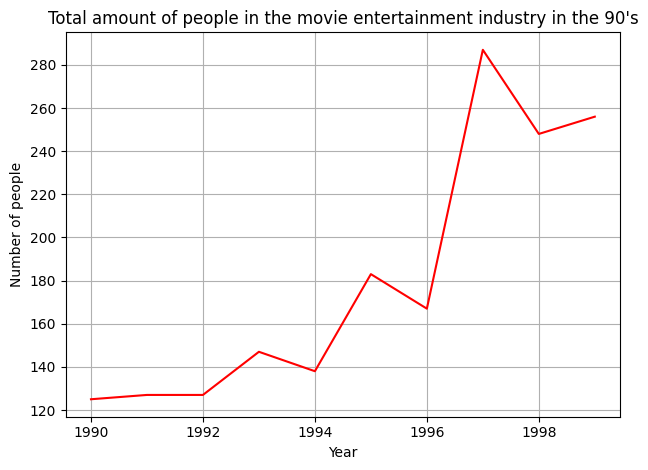

In [77]:
# Filtering the top 3 directors of the 90's era
cl_director = classic_movies['director'].value_counts().head(3)
for director, count in cl_director.items():
   print(f"{director}: {count}")

# Add a blank line for spacing
print()

# Filtering the most popular cast members of the 90's era
cl_cast = classic_movies['cast'].value_counts().head(1)
for cast, count in cl_cast.items():
   print(f'Most popular cast member: {cast} (Starred in {count} movies)')

print()

# Vizualizing the total amount of people in the movie entertainment industry in the 90's
years = []
total_casts_yearly = []

for year in range(1990, 2000):

  # Filter movies per year
  cl_movies_per_year = classic_movies[classic_movies['release_year'] == year]

  # Process cast
  cl_cast_raw = cl_movies_per_year['cast'].dropna().str.split(',')
  cl_cast_cleaned = [member.strip() for sublist in cl_cast_raw for member in sublist]

  # Process director
  cl_directors = cl_movies_per_year['director'].dropna().tolist()
  cl_directors_cleaned = [d.strip() for d in cl_directors]

  # Combine cast + directors and compute unique individuals
  cl_total_people = set(cl_cast_cleaned + cl_directors_cleaned)
  cl_unique_count = len(cl_total_people)

  # Store results
  years.append(year)
  total_casts_yearly.append(cl_unique_count)

plt.plot(years, total_casts_yearly, color='red')
plt.title("Total amount of people in the movie entertainment industry in the 90's")
plt.xlabel("Year")
plt.ylabel("Number of people")
plt.grid(True)
plt.tight_layout()
plt.show()

Raúl Campos, Jan Suter: 18
Marcus Raboy: 13
Jay Karas: 9

Most popular cast member: Vir Das (Starred in 4 movies)



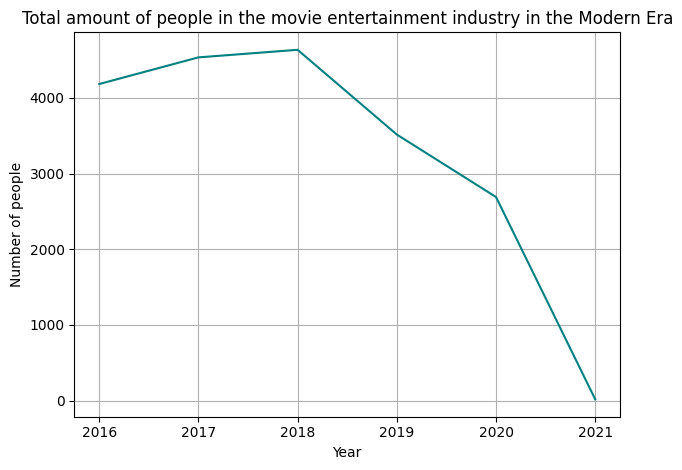

In [76]:
# Filtering the top 3 directors of the 90's era
modern_directors = modern_movies['director'].value_counts().head(3)
for director, count in modern_directors.items():
   print(f"{director}: {count}")

# Add a blank line for spacing
print()

# Filtering the most popular cast members of the 90's era
modern_cast = modern_movies['cast'].value_counts().head(1)
for cast, count in modern_cast.items():
   print(f'Most popular cast member: {cast} (Starred in {count} movies)')

print()

# Vizualizing the total amount of people in the movie entertainment industry in the modern era
years = []
total_casts_yearly = []

for year in range(2016, 2022):

  # Filter movies per year
  md_movies_per_year = modern_movies[modern_movies['release_year'] == year]

  # Process cast
  md_cast_raw = md_movies_per_year['cast'].dropna().str.split(',')
  md_cast_cleaned = [member.strip() for sublist in md_cast_raw for member in sublist]

  # Process director
  md_directors = md_movies_per_year['director'].dropna().tolist()
  md_directors_cleaned = [d.strip() for d in md_directors]

  # Combine cast + directors and compute unique individuals
  md_total_people = set(md_cast_cleaned + md_directors_cleaned)
  md_unique_count = len(md_total_people)

  # Store results
  years.append(year)
  total_casts_yearly.append(md_unique_count)

plt.plot(years, total_casts_yearly, color='Teal')
plt.title("Total amount of people in the movie entertainment industry in the Modern Era")
plt.xlabel("Year")
plt.ylabel("Number of people")
plt.grid(True)
plt.tight_layout()
plt.show()

⚡**Insights and Information**

---
**What was unique about the 90's?**

*  Dominant Genres: This study shows that back in the 1990's genres such as *Action*, *Drama*, and *Comedy* being the top 3 within that decade.

*  The Regional Focus: The top countries producing 90s content were primarily the US, UK, and India, reflecting limited global representation.

*  Shorter Durations: Many 90s movies clustered around shorter durations (90–100 mins), suggesting a trend toward tighter narratives.


**What genres from the 90s could perform well again?**

*  Genres like *Action* and *Drama* had a strong presence and continue to be popular. Reviving these with a nostalgic twist (e.g., stylistic elements, reboots) could attract both older and younger audiences.


**How has content strategy shifted?**

*  Modern Variety: Compared to the 90s, modern movies show more diversity in genres and global origin.

*  Inclusive Storytelling: The range of countries and directors has broadened significantly, indicating a more globalized content strategy.


🟩 **Recommendations**

---

*   Leverage Nostalgia:

  *If Netflix wants to appeal to nostalgia-driven users, it should consider reviving 90s-style action and drama films. These genres were dominant and still have strong appeal.*

*   Reboot Strategy:

  *Netflix could explore reboots of 90s titles or create new stories with 90s aesthetics, tapping into the retro trend.*

*   Optimize Movie Length:

  *Modern viewers appreciate flexible viewing times. Reviving shorter movie formats from the 90s could improve engagement.*

*   Casting and Storytelling:

  *Bringing back simpler, director-led storytelling from the 90s could offer a refreshing counter to high-budget franchises.*